<a href="https://colab.research.google.com/github/GAJANAN07/PROJECT-3-E-Learning-website-Feynn-Labs/blob/main/E_LEARNING_PLATFORM_(Gajanan_Purud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:

# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [143]:
dataset_path = '/content/Online_Courses (1).csv'
data = pd.read_csv(dataset_path)

## Displaying the first few rows of the dataset

In [144]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Unnamed: 0                                              Title  \
0           0                    Machine Learning Specialization   
1           1        Introduction to Data Science Specialization   
2           2  Data Science Fundamentals with Python and SQL ...   
3           3       Key Technologies for Business Specialization   
4           4                       Deep Learning Specialization   

                                                 URL  \
0  https://www.coursera.org/specializations/machi...   
1  https://www.coursera.org/specializations/intro...   
2  https://www.coursera.org/specializations/data-...   
3  https://www.coursera.org/specializations/key-t...   
4  https://www.coursera.org/specializations/deep-...   

                                         Short Intro      Category  \
0  #BreakIntoAI with Machine Learning Specializat...  Data Science   
1  Launch your career in data science. Gain found...  Data Science   
2  Build the Fo

## data type information and missing values

In [145]:
print("\nData type information:")
print(data.info())



Data type information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8092 non-null   int64  
 1   Title                  8092 non-null   object 
 2   URL                    8092 non-null   object 
 3   Short Intro            8040 non-null   object 
 4   Category               2819 non-null   object 
 5   Sub-Category           2819 non-null   object 
 6   Course Type            2819 non-null   object 
 7   Language               2819 non-null   object 
 8   Subtitle Languages     2802 non-null   object 
 9   Skills                 2099 non-null   object 
 10  Instructors            2808 non-null   object 
 11  Rating                 2742 non-null   object 
 12  Number of viewers      2695 non-null   object 
 13  Duration               7944 non-null   object 
 14  Site                   8092 non-

In [146]:
# Display summary statistics for numerical columns
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Unnamed: 0  Unique Projects        Price
count  8092.00000              0.0    65.000000
mean   1946.04214              NaN   903.830769
std    1346.92197              NaN   665.949617
min       0.00000              NaN   129.000000
25%     796.00000              NaN   534.000000
50%    1807.50000              NaN   855.000000
75%    2819.25000              NaN  1099.000000
max    4842.00000              NaN  4600.000000


In [147]:
for col in data.columns:
  print(col)

Unnamed: 0
Title
URL
Short Intro
Category
Sub-Category
Course Type
Language
Subtitle Languages
Skills
Instructors
Rating
Number of viewers
Duration
Site
Program Type
Courses
Level
Number of Reviews
Unique Projects
Prequisites
What you learn
Related Programs
Monthly access
6-Month access
4-Month access
3-Month access
5-Month access
2-Month access
School
Topics related to CRM
ExpertTracks
FAQs
Course Title
Course URL
Course Short Intro
Weekly study
Premium course
What's include
Rank
Created by
Program
Number of ratings
Price
COURSE CATEGORIES


## Exploratory Data Analysis (EDA)

In [148]:
data

,Unnamed: 0,Title,URL,Short Intro,Category,Sub-Category,Course Type,Language,Subtitle Languages,Skills,...,Course Short Intro,Weekly study,Premium course,What's include,Rank,Created by,Program,Number of ratings,Price,COURSE CATEGORIES
0,0,Machine Learning Specialization,https://www.coursera.org/specializations/machi...,#BreakIntoAI with Machine Learning Specializat...,Data Science,Machine Learning,Specialization,English,Subtitles: English,"Decision Trees, Artificial Neural Network, Log...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Introduction to Data Science Specialization,https://www.coursera.org/specializations/intro...,Launch your career in data science. Gain found...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Relational Database Management S...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Data Science Fundamentals with Python and SQL ...,https://www.coursera.org/specializations/data-...,Build the Foundation for your Data Science car...,Data Science,Data Analysis,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Github, Python Programming, Jupy...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Key Technologies for Business Specialization,https://www.coursera.org/specializations/key-t...,Get Ahead with Key Business Technologies. Gain...,Business,Business Essentials,Specialization,English,"Subtitles: English, Arabic, French, Portuguese...","Data Science, Artificial Intelligence (AI), Bu...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Deep Learning Specialization,https://www.coursera.org/specializations/deep-...,Become a Machine Learning expert. Master the f...,Data Science,Machine Learning,Specialization,English,"Subtitles: English, Chinese (Traditional), Ara...","Artificial Neural Network, Convolutional Neura...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,143,Certified Scrum Master,https://www.simplilearn.com/certified-scrum-ma...,This Certified ScrumMaster® (CSM) certificatio...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,369,NaN,Agile and Scrum
8088,144,Salesforce Basics Course for Beginners,https://www.simplilearn.com/salesforce-course?...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,348,NaN,Big Data
8089,145,ICP-ACC (ICAgile Certified Agile Coaching) Cer...,https://www.simplilearn.com/certified-agile-co...,This ICP-ACC Certification Training Course aim...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,301,NaN,Agile and Scrum
8090,146,/irisprodflip456,https://www.simplilearn.com/irisprodflip456?tag=,Iris Production check 456,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Course,293,NaN,Big Data Analytics


## Analyzing Popular Courses

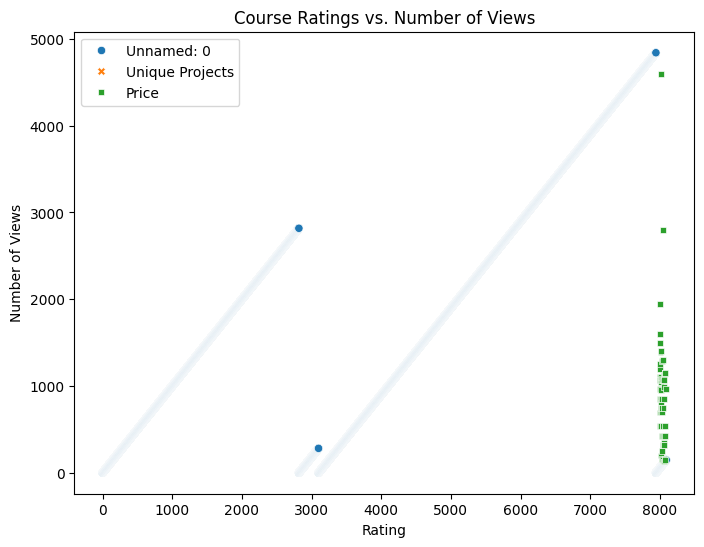

In [149]:
# Scatter plot of course ratings vs. number of views
plt.figure(figsize=(8, 6))
sns.scatterplot( data=data)
plt.title("Course Ratings vs. Number of Views")
plt.xlabel("Rating")
plt.ylabel("Number of Views")
plt.show()

## Segmenting Data by Language

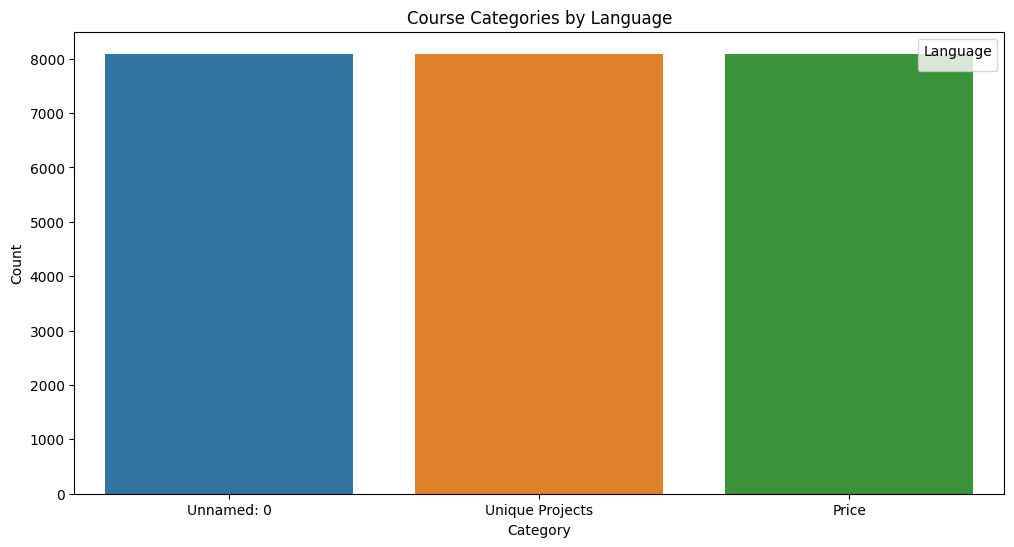

In [150]:
# Bar plot showing course categories by language
plt.figure(figsize=(12, 6))
sns.countplot( data=data)
plt.title("Course Categories by Language")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title='Language')
plt.show()

In [151]:
# Analyze further based on the data
print()
print(data)


      Unnamed: 0                                              Title  \
0              0                    Machine Learning Specialization   
1              1        Introduction to Data Science Specialization   
2              2  Data Science Fundamentals with Python and SQL ...   
3              3       Key Technologies for Business Specialization   
4              4                       Deep Learning Specialization   
...          ...                                                ...   
8087         143                             Certified Scrum Master   
8088         144             Salesforce Basics Course for Beginners   
8089         145  ICP-ACC (ICAgile Certified Agile Coaching) Cer...   
8090         146                                   /irisprodflip456   
8091         147                       Introduction to Industry 4.0   

                                                    URL  \
0     https://www.coursera.org/specializations/machi...   
1     https://www.coursera.o

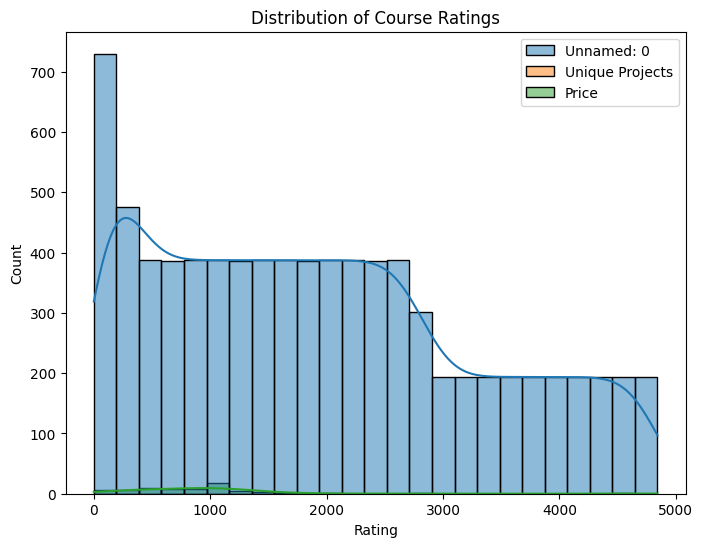

In [152]:
# Distribution of course ratings
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True)
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Analyzing Course Categories

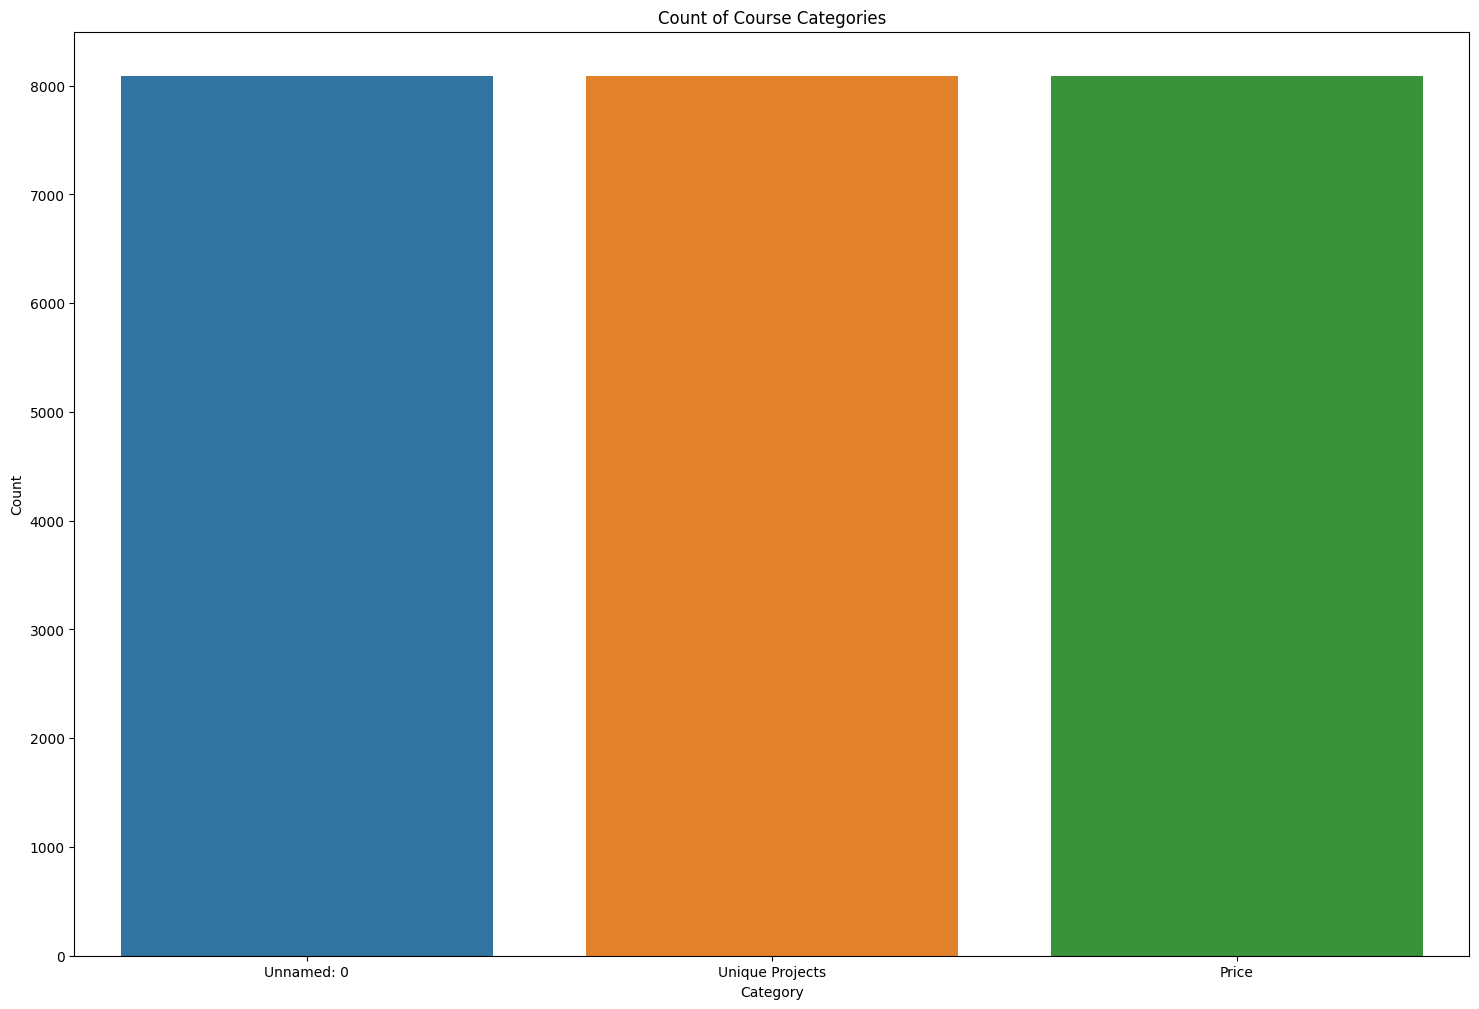

In [153]:
# Count plot of course categories
plt.figure(figsize=(18, 12))
sns.countplot( data=data)
plt.title("Count of Course Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Short Course Introduction

In [154]:
# Display the first few rows of short course introductions
print("Short Course Introductions:")
print(data[[]].head(5))

Short Course Introductions:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


## Popular Skills

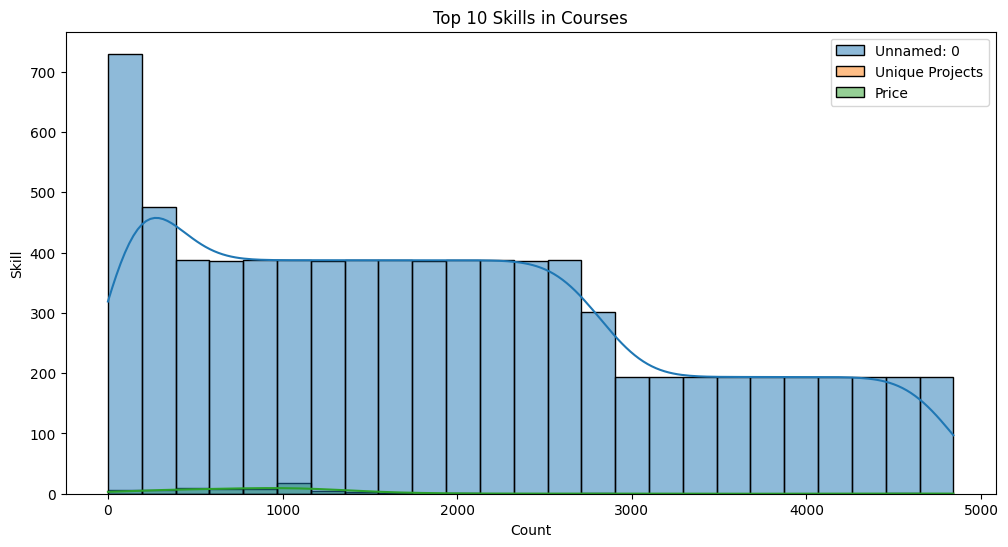

In [155]:
# Split 'skills' by comma and create a count plot of the most common skills


plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True)
plt.title("Top 10 Skills in Courses")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


In [156]:
# If there's a 'date_added' or similar field, analyze trends over time
if 'date_added' in data.columns:
    data['date_added'] = pd.to_datetime(data['date_added'])
    data['year'] = data['date_added'].dt.year
    plt.figure(figsize=(12, 6))
    sns.countplot(x='year', data=data)
    plt.title("Courses Added Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Courses")
    plt.show()

In [157]:
# If multiple sites host courses, analyze them by site
if 'site' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='site', data=data)
    plt.title("Course Distribution by Site")
    plt.xlabel("Site")
    plt.ylabel("Count")
    plt.show()

# Conclusion of E-Learning Platform

Conclusion of E-Learning Platform Based on Market Segmentation and Analysis

Market segmentation and analysis are crucial in understanding the dynamics of the e-learning platform market. Here is a conclusion derived from a comprehensive study that considers several segmentation factors and market trends:

E-learning platforms offer vast opportunities in a rapidly growing market. Effective market segmentation and analysis provide a pathway to success by addressing the unique needs of different user groups. Platforms that combine tailored content, technology innovation, and strong partnerships are well-positioned to thrive in this competitive landscape. By continuously adapting to market trends and user feedback, e-learning platforms can create lasting value and impact in the education sector

Strategic Focus

To succeed in this dynamic environment, e-learning platforms should focus on:

- Tailored Content:
  Create content that meets the specific needs of each segment, including industry-specific courses, professional development, and academic programs.

- Localized Content:
  Invest in localization to reach global audiences, ensuring content is accessible and relevant across different regions.

- Technology-Driven Solutions:
  Embrace technology to enhance user experiences, utilizing AI, VR/AR, and data analytics to create personalized and engaging learning pathways.

- Collaborative Partnerships:
  Build relationships with educational institutions, industry leaders, and corporate clients to expand the platform's reach and credibility.

- Strong Compliance and Security:
  Maintain strict compliance with regulations and ensure data security to foster user trust.

By embracing these strategic focus areas, e-learning platforms can achieve sustainable growth and make a significant impact on the education landscape. As the market continues to evolve, platforms that remain adaptable and innovative will be best positioned for long-term success.